<a href="https://colab.research.google.com/github/Swayamprakashpatel/Principle-Component-Regression/blob/main/PCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 — Initial Setup
We first import all the necessary libraries and data and then perform the appropriate train test split. The original dataset has ten predictor variables and one target variable (quality) 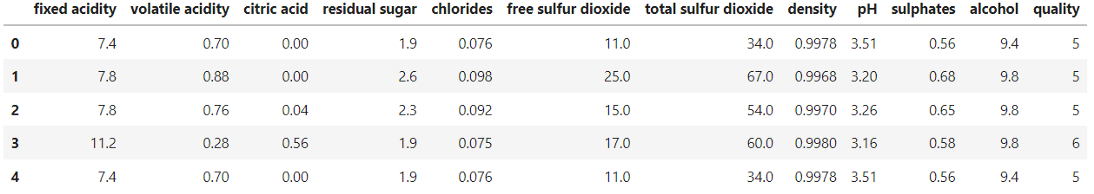

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

# Load your UV spectroscopy data (replace 'your_data.csv' with your file)
url = '/content/Data_1.csv'
df = pd.read_csv(url)

# Assume your data has wavelengths as features and the target variable as the last column
X = df.iloc[:, :-3].values
y = df.iloc[:,101:102].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train)
print(y)

Step 2 — Standardize Features
Before running PCR, it is crucial to standardize each original feature to be on the same scale before generating the principal components.

The reason is that principal component computation is based on variance, which is impacted by the range of the features.

If no standardization is applied, the features with larger ranges (and thus higher variance) will dominate and play an unfairly huge role in the principal components generated.

We use the scale() method from sklearn.preprocessing to standardize the original features, i.e., center to the mean and scale to unit variance.

In [ ]:
# Run standardization on X variables
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

Step 3 — Run Baseline Regression Models
To evaluate the performance of the PCR model, we need to have benchmarks to compare with. Thus we run three baseline models (Standard Linear Regression, Lasso Regression, and Ridge Regression) and save the RMSE scores.

In particular, we want to save the following:

10-fold cross-validation RMSE in the training set
Prediction RMSE on the test set

In [ ]:
# Define cross-validation folds
cv = KFold(n_splits=2, shuffle=True, random_state=42)

# Linear Regression
lin_reg = LinearRegression().fit(X_train_scaled, y_train)
lr_score_train = -1 * cross_val_score(lin_reg, X_train_scaled, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
lr_score_test = mean_squared_error(y_test, lin_reg.predict(X_test_scaled), squared=False)

# Lasso Regression
lasso_reg = LassoCV().fit(X_train_scaled, y_train)
lasso_score_train = -1 * cross_val_score(lasso_reg, X_train_scaled, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
lasso_score_test = mean_squared_error(y_test, lasso_reg.predict(X_test_scaled), squared=False)

# Ridge Regression
ridge_reg = RidgeCV().fit(X_train_scaled, y_train)
ridge_score_train = -1 * cross_val_score(ridge_reg, X_train_scaled, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
ridge_score_test = mean_squared_error(y_test, ridge_reg.predict(X_test_scaled), squared=False)

Step 4 — Generate Principal Components
The principal components for the original features can be generated using PCA() from sklearn.decomposition.

In [ ]:
# Generate all the principal components
pca = PCA() # Default n_components = min(n_samples, n_features)
X_train_pc = pca.fit_transform(X_train_scaled)

# View first 5 rows of all principal components
pd.DataFrame(pca.components_.T).loc[:,:]

,0,1,2,3,4,5,6,7,8,9,...,839,840,841,842,843,844,845,846,847,848
0,-1.410087e-03,-1.560720e-02,-4.886533e-02,1.581429e-02,-2.213190e-02,1.561291e-02,7.023595e-02,-4.091233e-02,3.462359e-02,8.859691e-02,...,-0.047735,-0.023386,0.032517,-0.034227,0.016535,-0.001963,0.024717,-0.014667,0.007389,0.019246
1,-1.006106e-02,1.299729e-03,-4.139239e-02,3.940386e-03,-2.203927e-02,3.646854e-02,7.347609e-02,-4.368722e-02,2.094305e-02,3.650551e-02,...,-0.003511,-0.010194,0.003382,0.004847,-0.000155,-0.000739,-0.000507,0.002075,-0.003928,-0.001424
2,-4.891865e-03,-5.488164e-03,-1.013032e-02,-1.696556e-02,-1.361388e-02,4.142227e-02,6.471813e-02,-4.232845e-02,7.827332e-03,2.506536e-02,...,-0.011330,0.021416,-0.011368,-0.019230,-0.007329,-0.007933,0.012447,0.006326,0.005803,-0.005159
3,-7.318271e-03,1.123375e-02,1.842634e-02,-5.353665e-03,2.926789e-03,3.864381e-02,6.779382e-02,-5.263135e-02,8.260938e-03,-2.446177e-02,...,0.019357,-0.080649,0.037434,0.004847,0.011656,0.017960,0.003869,0.008723,-0.006036,0.003548
4,-1.238633e-16,1.227791e-16,-1.863201e-16,-3.391520e-17,2.598358e-17,3.604972e-17,-1.321913e-16,9.859464e-18,6.282952e-17,-1.232196e-16,...,-0.036714,-0.015724,0.007259,-0.051658,0.042440,-0.006084,0.033851,-0.050860,0.045865,0.022991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000
1758,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000
1759,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000
1760,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000


In [ ]:
p = pca.explained_variance_ratio_
p = pd.DataFrame(p)
p.to_csv("data1.csv")

A preview of the resulting 11 principal components is shown below, with the first principal component (containing the most information) located in the leftmost column. 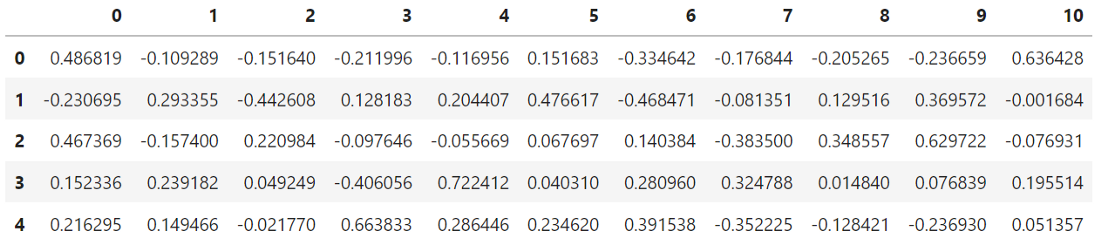

We can also view the explained variance of each principal component using pca.explained_variance_ratio_. 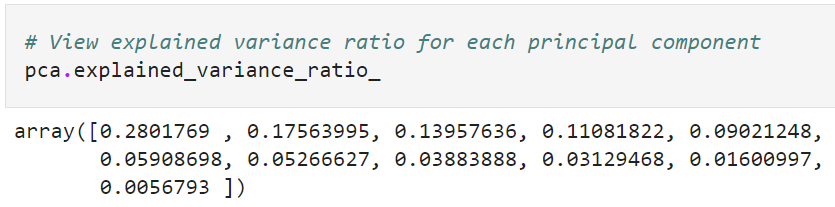

Step 5 — Determine the Number of Principal Components
Since we do not want to use all the principal components, the question now is how many principal components we should use for regression analysis.

The number of principal components (k) is typically determined by
cross-validation and visual analysis.

The value k is essentially a hyperparameter that we need to tune. We iterate over an increasing number of principal components to include in regression modeling and assess the resulting RMSE scores.



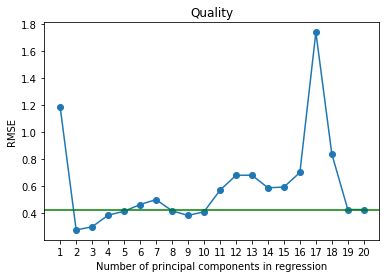

In [ ]:
# Initialize linear regression instance
lin_reg = LinearRegression()

# Create empty list to store RMSE for each iteration
rmse_list = []

# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg,
                                      X_train_pc[:,:i], # Use first k principal components
                                      y_train,
                                      cv=cv,
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)

# Visual analysis - plot RMSE vs count of principal components used
plt.plot(rmse_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('RMSE')
plt.title('Quality')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=lr_score_train, color='g', linestyle='-');

The next task is to inspect the plot of training set cross-validation RMSE vs. the number of principal components used: 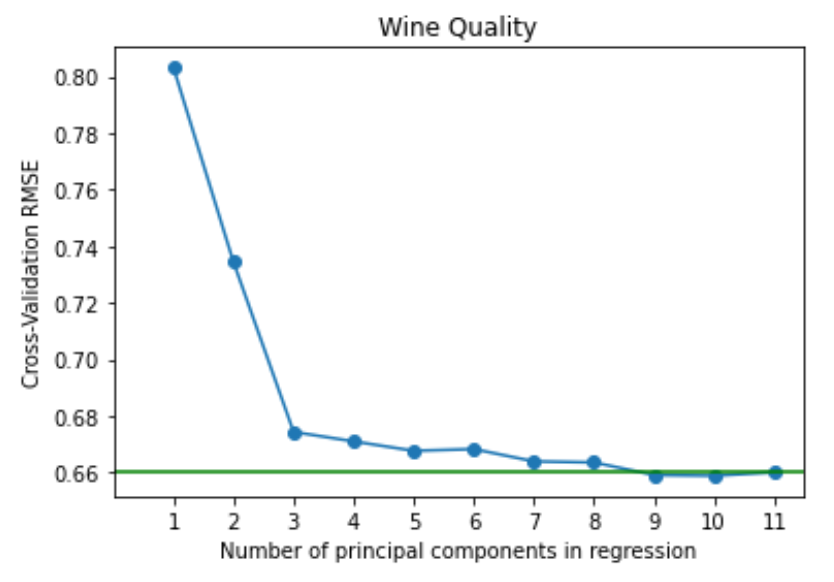

We see that the training set performance of PCR improves (i.e., RMSE decreases) with more principal components, in line with what we expect.

The green line is the RMSE benchmark from the baseline standard linear regression model using all original features.

The plot shows that the lowest cross-validation RMSE (minimum point in the plot) occurs when there are M=9 principal components. The RMSE at M=9 is, in fact, slightly below the green line.

Note: If we want even fewer components while maintaining relatively similar performance, the choice of M=7 is also a reasonable choice here.

Step 6 — Run PCR with Best Number of Principal Components
After determining the best number of principal components to use (i.e., M=9), we proceed to run PCR on our test dataset.

First, this is done by training a new linear regression model on the first 9 principal components of the training set. We then use this trained model to perform prediction on the first 9 principal components of the test set.

In [ ]:
# Visually determine optimal number of principal components
best_pc_num = 2

# Train model with first 9 principal components
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

# Get cross-validation RMSE (train set)
pcr_score_train = -1 * cross_val_score(lin_reg_pc,
                                       X_train_pc[:,:best_pc_num],
                                       y_train,
                                       cv=cv,
                                       scoring='neg_root_mean_squared_error').mean()

# Train model on training set
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

# Get first 9 principal components of test set
X_test_pc = pca.transform(X_test_scaled)[:,:best_pc_num]

# Predict on test data
preds = lin_reg_pc.predict(X_test_pc)
pcr_score_test = mean_squared_error(y_test, preds, squared=False)

In [ ]:
print(lin_reg_pc.score(X_train_pc[:,:best_pc_num], y_train))
print(lin_reg_pc.coef_)
print(lin_reg_pc.intercept_)

0.9928546617111564
[ 0.21639491 -0.18151554]
6.2


**PREDICTION OF UNKNOWN ABSORBANCE DATA**

In [ ]:
df1 = pd.read_csv('/content/RK.csv', sep=',')
X_prediction = X
X_prediction = scale(X_prediction)
X_prediction = pca.fit_transform(X_prediction)
Prediction = lin_reg_pc.predict(X_prediction[:,:best_pc_num])
print(Prediction)

[ 2.02018868  3.86641308  6.41667847  8.26847035 10.22250365  1.88061828
  3.89906078  6.52537255  8.53162926 10.37778482  2.05462513  4.09025304
  6.30257177  8.21327846 10.02631148  2.72226779  4.12135734  6.28067761
  8.25500192  9.66105723  2.21515474  3.94026362  6.516135    8.37666639
 10.21565855]


In [ ]:
print("\nMean Squared Errors:\n", " \n(1) Linear Regression:\n ", lr_score_test, "\n(2) Lasso Regression:\n", lasso_score_test,"\n(3) Ridge Regresion\n", ridge_score_test,"\n(4) PCR:\n", pcr_score_test)


Mean Squared Errors:
  
(1) Linear Regression:
  1.140708120712652 
(2) Lasso Regression:
 1.112795251522991 
(3) Ridge Regresion
 1.1612011404893086 
(4) PCR:
 1.200097154065856


In [ ]:
#PREDICT USING PCR
df1 = pd.read_csv('/content/Dataset.csv', sep=',')
X_prediction = df1
X_prediction = scale(X_prediction)
X_prediction = pca.fit_transform(X_prediction)
Prediction = lin_reg_pc.predict(X_prediction)

In [ ]:
import tensorflow as tf
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

X_train, X_test, y_train, y_test = train_test_split(X, scale(y), test_size=0.2, random_state=42)

filepath = '/content/Model.hdf5'

checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', mode='max', save_best_only=True, Save_weights_only = False, verbose = 1),
              tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=100, verbose =1), [tensorboard_callback]]

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(224, activation='linear', input_shape=(203,)),
                             tf.keras.layers.Dense(224, activation='linear'),
                             tf.keras.layers.Dense(224, activation='linear'),
                             tf.keras.layers.Dense(1, activation= 'linear')])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.BinaryCrossentropy(from_logits = False), metrics=['accuracy'])

hist = model.fit(X_train_scaled.astype(np.int64), y_train.astype(np.int64), epochs= 2000, callbacks=[checkpoint],validation_data=(X_test_scaled.astype(np.int64), y_test.astype(np.int64)), batch_size= 10)